In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [62]:
x = np.arange(0, 1.6, 0.1)
y = np.arange(5, 75, 0.1)/1e6
beta1, beta2, beta3, gamma1, gamma2, gamma3, alpha = -0.1832, 0.3524, 24.32, 3.108e-08, -7.563e09, 4.594e10, 1e-6
z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = np.exp(beta1/(1+beta2*(alpha*x[i])  )) *\
        np.cosh(beta3 * (alpha*x[i])/(1+beta2*(alpha*x[i])))*\
        (gamma1 + gamma2*np.sqrt(y[j]) + gamma3 * y[j])
# Create meshgrid for X and Y
X, Y = np.meshgrid(x, y)

# Transpose Z to match the shape of X, Y (needed for 3D plotting)
Z = z.T


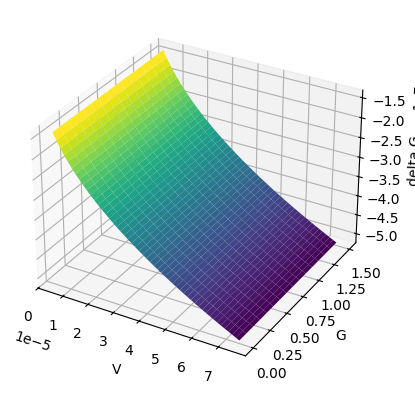

In [67]:

# Plot 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
ax.plot_surface(Y, X, Z, cmap='viridis')

# Set labels
ax.set_xlabel('V')
ax.set_ylabel('G')
ax.set_zlabel('delta G')

# Show plot
plt.show()